In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

import itertools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve, roc_auc_score

In [2]:
df=pd.read_csv("fake_or_real_news.csv")
df.shape


(6335, 4)

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [5]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [7]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [8]:
pac=PassiveAggressiveClassifier(max_iter=100)
pac.fit(tfidf_train,y_train)

y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.13%


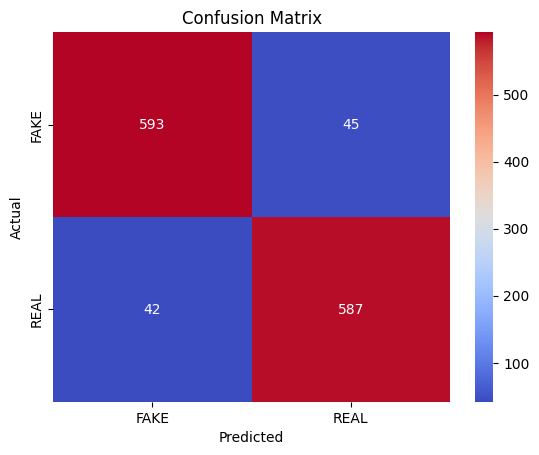

In [9]:
cm = confusion_matrix(y_test, y_pred, labels=["FAKE", "REAL"])
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=["FAKE", "REAL"], yticklabels=["FAKE", "REAL"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

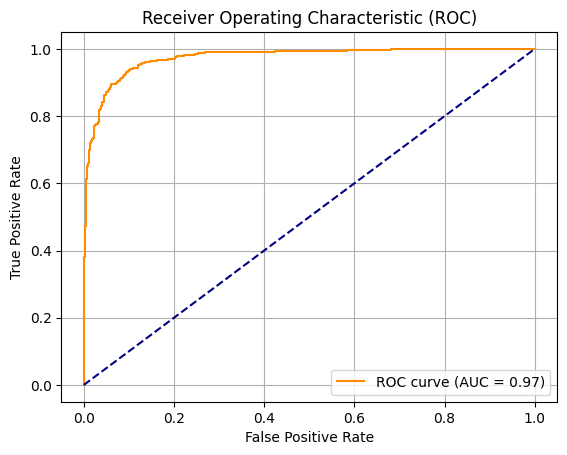

In [10]:
model = LogisticRegression()
model.fit(tfidf_train, y_train)
y_pred = model.predict(tfidf_test)
y_proba = model.predict_proba(tfidf_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test.map({'FAKE': 0, 'REAL': 1}), y_proba)
auc_score = roc_auc_score(y_test.map({'FAKE': 0, 'REAL': 1}), y_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [11]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM (Linear)": LinearSVC(),
}

for name, model in models.items():
    model.fit(tfidf_train, y_train)
    y_pred = model.predict(tfidf_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["FAKE", "REAL"]))


Logistic Regression Accuracy: 91.71%
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.90      0.94      0.92       638
        REAL       0.94      0.89      0.91       629

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267


Naive Bayes Accuracy: 84.06%
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.97      0.71      0.82       638
        REAL       0.77      0.98      0.86       629

    accuracy                           0.84      1267
   macro avg       0.87      0.84      0.84      1267
weighted avg       0.87      0.84      0.84      1267


Random Forest Accuracy: 89.90%
Classification Report:
              precision    recall  f1-score   support

        FAKE       0.90      0.89      0.90       638
        REAL       0.89      0.90      0.90       629

    accuracy 

In [12]:
scores = cross_val_score(pac, tfidf_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.93786982 0.94970414 0.93984221 0.93188549 0.93682132]
